<a href="https://colab.research.google.com/github/PervejHosen/Python_Projects/blob/main/Project_04_(Segment_customers_with_rfm%26_k_means).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Dataset**
A transnational data set which contains all the transactions occurring between 2010/12/01 and 2011/12/09 for a UK-based and registered non-store online retail.<br>
The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.
<br>

### **Goal**
Segment customers with RFM and K-Means in order to target customers efficiently.

### **Data Source**
<a href="https://archive.ics.uci.edu/ml/datasets/online+retail">Online retail - UCI Machine Learning Repository</a>

### **Tool**
* Python
* Power BI

### **Steps**

1. [Reading and Exploring Data](#1) <br>
2. [Data Cleaning](#2) <br>
3. [Calculating RFM Metrics](#3) <br>
4. [Data Preprocessing](#4) <br>
5. [K-Means Clustering](#5) <br>
6. [Conclusion](#6) <br>

<a id="1"></a> <br>
## <font color='blue'> 1. Reading and Exploring Data </font>

<font color='orange'> Importing Neccessary Libraries </font>

In [1]:
# Import Libraries for Dataframe and Visualization
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

# Import Libraries for Machine Learning Algorithm
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<font color='orange'> Mounting with Drive </font>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<font color='orange'> Reading the Data </font>

In [4]:
# Read Data
df = pd.read_excel('/content/drive/MyDrive/Python/Datasets/Online Retail.xlsx')
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<font color='orange'> Data Descriptions </font>

In [5]:
df.shape

(541909, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


<font color='orange'> Summary Statistics </font>

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


<a id="2"></a> <br>
## <font color='blue'> 2. Data Cleaning </font>
    
1. Check and Drop Missing Values
1. Check and Drop Duplicates
1. Check and Change Data Types
1. Exclude Noisy Data


### <font color='orange'> 1. Check and Drop Missing Values </font>

In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<font color='Blue'> So, we have null values in Descriptions and CustomerID Columns </font>

In [9]:
null = round((df.isnull().sum()) / len(df) * 100, 2)
null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [10]:
df = df.dropna(subset=['CustomerID'])
df.shape

(406829, 8)

### <font color='orange'> 2. Check and Drop Duplicates </font>

In [11]:
df.duplicated().sum()

5225

<font color='Blue'> So, we have 5225 duplicates values in our datasets </font>

In [13]:
df = df.drop_duplicates()
df.shape

(401604, 8)

<font color='Blue'> After droping/removing the duplicates now we have 401604 rows of data </font>

### <font color='orange'> 3. Check and Change Data Types </font>

In [14]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

<font color='blue'> Our CustomerID is in float format. We will convert it in String/Object format </font>

In [15]:
df['CustomerID'] = df['CustomerID'].astype('int').astype('str')
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

### <font color='orange'> 4. Exclude Noisy Data </font>
    
* Quantity: Negative Values
* UnitPrice: 0

In [16]:
df.describe()

,Quantity,UnitPrice
count,401604.000000,401604.000000
mean,12.183273,3.474064
std,250.283037,69.764035
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


<font color='blue'> See our data contains values 0 & negative values in `Quantity` & `Unitprice`. As we know `Quantity` & `UnitPrice` can not be zero. so we need to get rid of them. </font>

In [17]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df.describe()

,Quantity,UnitPrice
count,392692.000000,392692.000000
mean,13.119702,3.125914
std,180.492832,22.241836
min,1.000000,0.001000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


In [18]:
df.shape

(392692, 8)

In [19]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


<a id="3"></a> <br>
## <font color='blue'> 3. Calculating RFM Metrics </font>
    
1. Recency (R) : Number of days since the last purchase of  each customer. <br>
   Frequency (F) : Number of purchases each customer. <br>
   Monetary (M) : Total amount of money each customer spends.
1. RFM
1. RFM Score


### <font color='orange'> 1. Recency, Frequency, Monetary </font>

In [20]:
# Find the date after the last purchase
cal_date = df['InvoiceDate'].max() + dt.timedelta(days=1)
cal_date

Timestamp('2011-12-10 12:50:00')

In [21]:
# Create a column of Total Amount
df['Total'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [22]:
rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda x:(cal_date - x.max()).days,
                                    'InvoiceNo':'count',
                                    'Total':'sum'})

rfm.rename(columns = {'InvoiceDate':'Recency',
                      'InvoiceNo':'Frequency',
                      'Total':'Monetary'}, inplace = True)
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,326,1,77183.60
12347,2,182,4310.00
12348,75,31,1797.24
12349,19,73,1757.55
12350,310,17,334.40


### <font color='orange'> 2. RFM </font>

In [23]:
r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)

r_quartiles = pd.qcut(rfm['Recency'], q = 4, labels = r_labels)
f_quartiles = pd.qcut(rfm['Frequency'], q = 4, labels = f_labels)
m_quartiles = pd.qcut(rfm['Monetary'], q = 4, labels = m_labels)

rfm = rfm.assign(R = r_quartiles,
                 F = f_quartiles,
                 M = m_quartiles)
rfm.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346,326,1,77183.60,1,1,4
12347,2,182,4310.00,4,4,4
12348,75,31,1797.24,2,2,4
12349,19,73,1757.55,3,3,4
12350,310,17,334.40,1,1,2


In [24]:
def rfm_seg(x):
    return str(x['R']) + str(x['F']) + str(x['M'])

rfm['RFM'] = rfm.apply(rfm_seg, axis = 1)
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM
CustomerID,,,,,,,
12346,326,1,77183.60,1,1,4,1.01.04.0
12347,2,182,4310.00,4,4,4,4.04.04.0
12348,75,31,1797.24,2,2,4,2.02.04.0
12349,19,73,1757.55,3,3,4,3.03.04.0
12350,310,17,334.40,1,1,2,1.01.02.0


### <font color='orange'> 3. RFM Score </font>

In [25]:
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].sum(axis = 1)
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score
CustomerID,,,,,,,,
12346,326,1,77183.60,1,1,4,1.01.04.0,6
12347,2,182,4310.00,4,4,4,4.04.04.0,12
12348,75,31,1797.24,2,2,4,2.02.04.0,8
12349,19,73,1757.55,3,3,4,3.03.04.0,10
12350,310,17,334.40,1,1,2,1.01.02.0,4


In [26]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4338 entries, 12346 to 18287
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Recency    4338 non-null   int64   
 1   Frequency  4338 non-null   int64   
 2   Monetary   4338 non-null   float64 
 3   R          4338 non-null   category
 4   F          4338 non-null   category
 5   M          4338 non-null   category
 6   RFM        4338 non-null   object  
 7   RFM_Score  4338 non-null   int64   
dtypes: category(3), float64(1), int64(3), object(1)
memory usage: 216.4+ KB


<a id="4"></a> <br>
## <font color='blue'> 4. Data Preprocessing </font>
    
1. Detect Outliers
1. RFM Segmentation
1. Standardization
1. Elbow Method: Find the Optimal Number of Clusters

### <font color='orange'> 1. Detect Outliers </font>

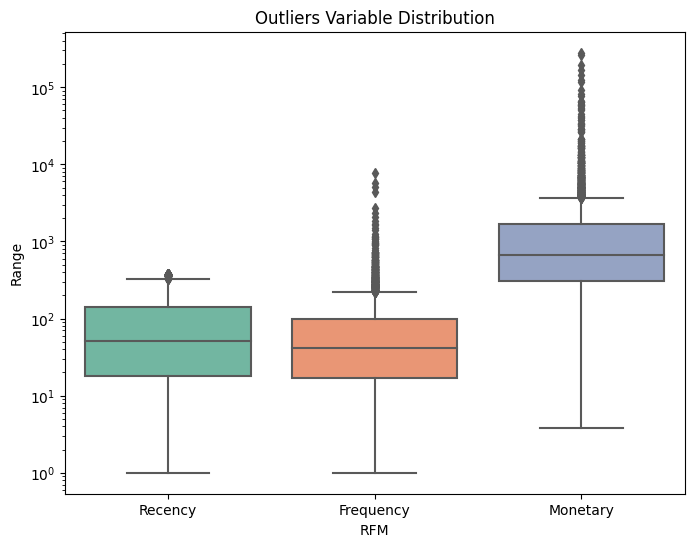

In [27]:
x = ['Recency', 'Frequency', 'Monetary']
f, ax = plt.subplots(figsize = (8, 6))

sns.boxplot(data = rfm[x], palette = 'Set2')
plt.yscale('log')
plt.title('Outliers Variable Distribution', fontsize = 12)
plt.xlabel('RFM')
plt.ylabel('Range')
plt.show()

In [28]:
def remove_outliers(dataframe, column, q1 = 0.05, q3 = 0.95):
    Q1 = dataframe[column].quantile(0.05)
    Q3 = dataframe[column].quantile(0.95)
    IQR = Q3 - Q1
    dataframe = dataframe[(dataframe[column] >= Q1 - 1.5 * IQR) & (dataframe[column] <= Q3 + 1.5 * IQR)]
    return dataframe

In [29]:
rfm = remove_outliers(rfm, 'Recency', q1 = 0.05, q3 = 0.95)
rfm = remove_outliers(rfm, 'Frequency', q1 = 0.05, q3 = 0.95)
rfm = remove_outliers(rfm, 'Monetary', q1 = 0.05, q3 = 0.95)
rfm.shape

(4255, 8)

In [30]:
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score
CustomerID,,,,,,,,
12347,2,182,4310.00,4,4,4,4.04.04.0,12
12348,75,31,1797.24,2,2,4,2.02.04.0,8
12349,19,73,1757.55,3,3,4,3.03.04.0,10
12350,310,17,334.40,1,1,2,1.01.02.0,4
12352,36,85,2506.04,3,3,4,3.03.04.0,10


In [31]:
# Reset Index
rfm.reset_index(inplace = True)
rfm.tail()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score
4250,18280,278,10,180.60,1,1,1,1.01.01.0,3
4251,18281,181,7,80.82,1,1,1,1.01.01.0,3
4252,18282,8,12,178.05,4,1,1,4.01.01.0,6
4253,18283,4,721,2045.53,4,4,4,4.04.04.0,12
4254,18287,43,70,1837.28,3,3,4,3.03.04.0,10


In [32]:
rfm.describe()

,Recency,Frequency,Monetary,RFM_Score
count,4255.000000,4255.000000,4255.000000,4255.000000
mean,94.002820,75.667685,1307.242605,7.423032
std,100.211094,98.066944,1774.795884,2.781350
min,1.000000,1.000000,3.750000,3.000000
25%,19.000000,17.000000,302.640000,5.000000
50%,52.000000,39.000000,652.740000,7.000000
75%,145.000000,95.000000,1564.645000,10.000000
max,374.000000,740.000000,13400.240000,12.000000


### <font color='orange'> 2. RFM Segmentation </font>

RFM Segmentation by RFM Score

* RFM Segment <br>

|RFM Score|Segment|
|---------|--------------------|
|     > 10|           champions|
|     9-10| potential_loyalists|
|        8|      need_attention|
|        7|      about_to_sleep|
|      5-6|             at_risk|
|      < 4|         hibernating|


In [33]:
def segments(df):
    if df['RFM_Score'] > 10:
        return 'champions'

    elif (df['RFM_Score'] > 8) and (df['RFM_Score'] <= 10):
        return 'potential_loyalists'

    elif df['RFM_Score'] == 8:
        return 'need_attention'

    elif df['RFM_Score'] == 7:
        return 'about_to_sleep'

    elif (df['RFM_Score'] > 4) and (df['RFM_Score'] < 7):
        return 'at_risk'

    else:
        return 'hibernating'

rfm['Segment'] = rfm.apply(segments, axis = 1)
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score,Segment
0,12347,2,182,4310.00,4,4,4,4.04.04.0,12,champions
1,12348,75,31,1797.24,2,2,4,2.02.04.0,8,need_attention
2,12349,19,73,1757.55,3,3,4,3.03.04.0,10,potential_loyalists
3,12350,310,17,334.40,1,1,2,1.01.02.0,4,hibernating
4,12352,36,85,2506.04,3,3,4,3.03.04.0,10,potential_loyalists


In [34]:
rfm.groupby(['Segment']).agg({'CustomerID':'count',
                              'Recency':'mean',
                              'Frequency':'mean',
                              'Monetary':'mean',
                              'RFM_Score':'mean'}).sort_values(by = 'RFM_Score', ascending = False).round(2)

,CustomerID,Recency,Frequency,Monetary,RFM_Score
Segment,,,,,
champions,760,14.34,220.34,3709.47,11.51
potential_loyalists,837,39.14,94.84,1657.59,9.51
need_attention,454,64.06,56.02,987.32,8.00
about_to_sleep,463,79.56,37.97,758.11,7.00
at_risk,972,125.84,24.39,415.00,5.47
hibernating,769,218.59,10.92,199.08,3.50


In [38]:
#import squarify
#segments = rfm['Segment'].value_counts(normalize = True).sort_values(ascending = False)
#segments

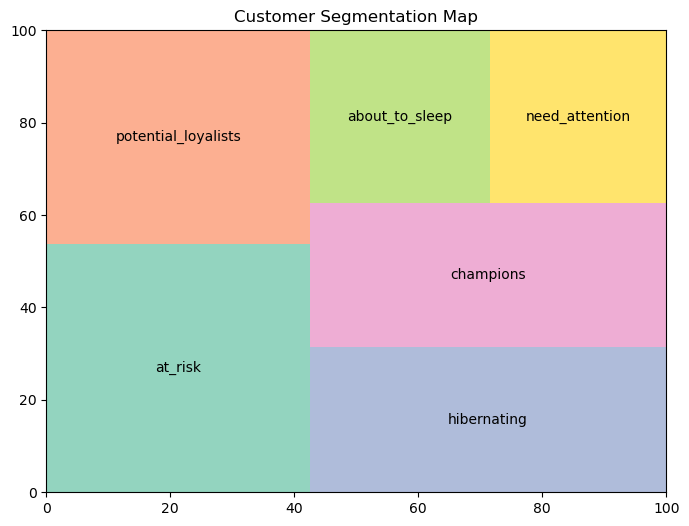

In [ ]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(8, 6)

squarify.plot(sizes = segments,
              label = ['at_risk', 'potential_loyalists', 'hibernating', 'champions', 'about_to_sleep', 'need_attention'],
              color = sns.color_palette('Set2'),
              bar_kwargs = {'alpha':0.7})
plt.title('Customer Segmentation Map', fontsize = 12)
plt.show()

### <font color='orange'> 3. Standardization </font>

In [ ]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4255 entries, 0 to 4254
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CustomerID  4255 non-null   object  
 1   Recency     4255 non-null   int64   
 2   Frequency   4255 non-null   int64   
 3   Monetary    4255 non-null   float64 
 4   R           4255 non-null   category
 5   F           4255 non-null   category
 6   M           4255 non-null   category
 7   RFM         4255 non-null   object  
 8   RFM_Score   4255 non-null   int64   
 9   Segment     4255 non-null   object  
dtypes: category(3), float64(1), int64(3), object(3)
memory usage: 245.7+ KB


In [ ]:
rfm_RFM = rfm[['Recency', 'Frequency', 'Monetary']]

scaler = StandardScaler()
rfm_standard = scaler.fit_transform(rfm_RFM)
rfm_standard = pd.DataFrame(rfm_standard)
rfm_standard.columns = ['Recency', 'Frequency', 'Monetary']
rfm_standard.head()

,Recency,Frequency,Monetary
0,-0.918198,1.084410,1.692088
1,-0.189650,-0.455535,0.276119
2,-0.748536,-0.027206,0.253753
3,2.155675,-0.598311,-0.548208
4,-0.578874,0.095174,0.675536


### <font color='orange'> 4. Elbow Method: Find the Optimal Number of Clusters </font>

In [ ]:
wcss =[]
range_k = range(1, 11)

for k in range_k:
    kmeans = KMeans(n_clusters = k, random_state = 46)
    kmeans.fit(rfm_standard)
    wcss.append(kmeans.inertia_)

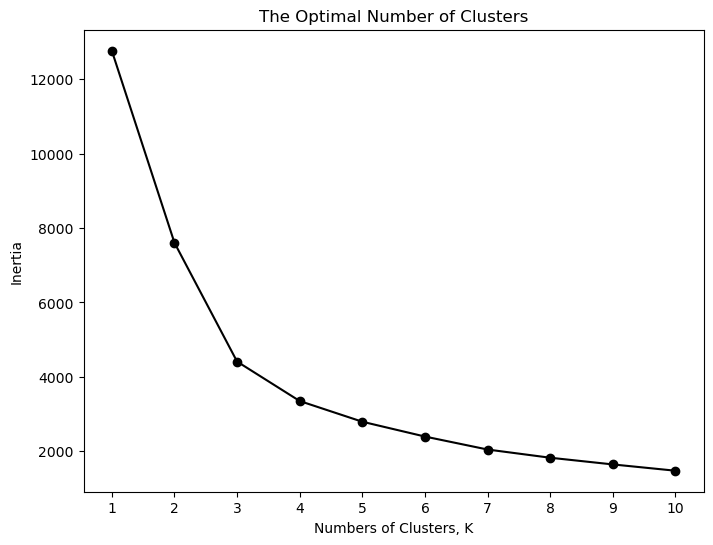

In [ ]:
f, ax = plt.subplots(figsize = (8, 6))

plt.plot(range_k, wcss, marker = 'o', color = 'black')
plt.title('The Optimal Number of Clusters', fontsize = 12)
plt.xlabel('Numbers of Clusters, K', fontsize = 10)
plt.ylabel('Inertia', fontsize = 10)
plt.xticks(range_k)
plt.show()

<a id="5"></a> <br>
## <font color='blue'> 5. K-Means Clustering </font>

In [ ]:
# Choose K=3
kmeans = KMeans(n_clusters = 3, random_state = 46)
kmeans.fit(rfm_standard)

cluster_labels = kmeans.labels_
cluster_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int32)

In [ ]:
rfm_k3 = rfm.assign(Cluster = cluster_labels)
rfm_k3.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score,Segment,Cluster
0,12347,2,182,4310.00,4,4,4,444,12,champions,1
1,12348,75,31,1797.24,2,2,4,224,8,need_attention,0
2,12349,19,73,1757.55,3,3,4,334,10,potential_loyalists,0
3,12350,310,17,334.40,1,1,2,112,4,hibernating,2
4,12352,36,85,2506.04,3,3,4,334,10,potential_loyalists,0


In [ ]:
rfm_k3.groupby('Cluster').agg({'Recency':'mean',
                               'Frequency':'mean',
                               'Monetary':'mean',
                               'RFM_Score':'mean'}).round(1)

,Recency,Frequency,Monetary,RFM_Score
Cluster,,,,
0,46.6,57.9,973.8,7.9
1,24.1,279.1,4981.0,11.3
2,249.1,25.3,429.3,4.4


In [ ]:
rfm.groupby(['Segment']).agg({'CustomerID':'count',
                              'Recency':'mean',
                              'Frequency':'mean',
                              'Monetary':'mean',
                              'RFM_Score':'mean'}).sort_values(by = 'RFM_Score', ascending = False)

,CustomerID,Recency,Frequency,Monetary,RFM_Score
Segment,,,,,
champions,760,14.335526,220.343421,3709.465553,11.507895
potential_loyalists,837,39.138590,94.836320,1657.592045,9.506571
need_attention,454,64.057269,56.024229,987.321674,8.000000
about_to_sleep,463,79.555076,37.971922,758.110043,7.000000
at_risk,972,125.838477,24.394033,414.996628,5.467078
hibernating,769,218.591678,10.923277,199.080897,3.504551


In [ ]:
rfm_k3.groupby(['Cluster', 'Segment']).agg({'CustomerID':'count',
                                            'RFM_Score':'mean'}).round(2)

CustomerID  RFM_Score
Cluster Segment                                   
0       about_to_sleep              392       7.00
        at_risk                     620       5.59
        champions                   339      11.32
        hibernating                 170       4.00
        need_attention              426       8.00
        potential_loyalists         759       9.49
1       about_to_sleep                1       7.00
        champions                   421      11.66
        need_attention                6       8.00
        potential_loyalists          69       9.78
2       about_to_sleep               70       7.00
        at_risk                     352       5.25
        hibernating                 599       3.36
        need_attention               22       8.00
        potential_loyalists           9       9.00

In [ ]:
rfm_standard['CustomerID'] = rfm['CustomerID']
rfm_standard = rfm_standard.assign(Cluster = cluster_labels)
rfm_standard.head()

,Recency,Frequency,Monetary,CustomerID,Cluster
0,-0.918198,1.084410,1.692088,12347,1
1,-0.189650,-0.455535,0.276119,12348,0
2,-0.748536,-0.027206,0.253753,12349,0
3,2.155675,-0.598311,-0.548208,12350,2
4,-0.578874,0.095174,0.675536,12352,0


In [ ]:
rfm_melt = pd.melt(rfm_standard,
                   id_vars = ['CustomerID', 'Cluster'],
                   value_vars = ['Recency', 'Frequency', 'Monetary'],
                   var_name = 'Metric',
                   value_name = 'Value')
rfm_melt.head()

,CustomerID,Cluster,Metric,Value
0,12347,1,Recency,-0.918198
1,12348,0,Recency,-0.189650
2,12349,0,Recency,-0.748536
3,12350,2,Recency,2.155675
4,12352,0,Recency,-0.578874


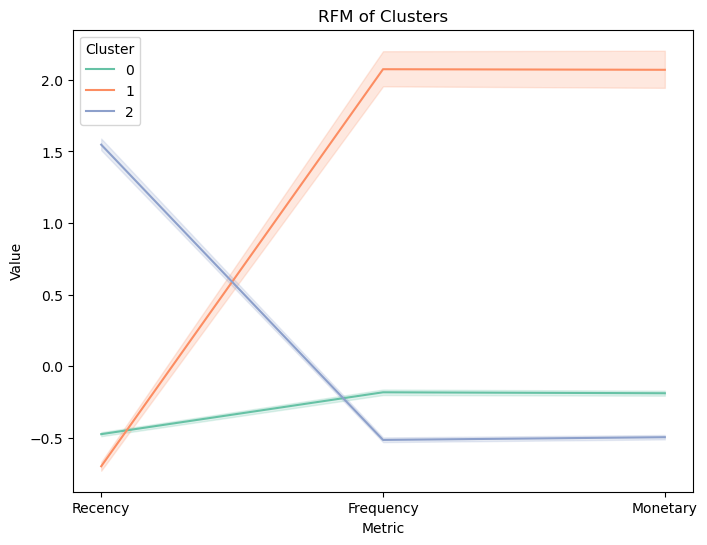

In [ ]:
f, ax = plt.subplots(figsize = (8, 6))

sns.lineplot(data = rfm_melt, x = 'Metric', y = 'Value',
             hue = 'Cluster',
             palette = sns.color_palette('Set2', n_colors=3),
             sort = False)

plt.title('RFM of Clusters', fontsize = 12)
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()

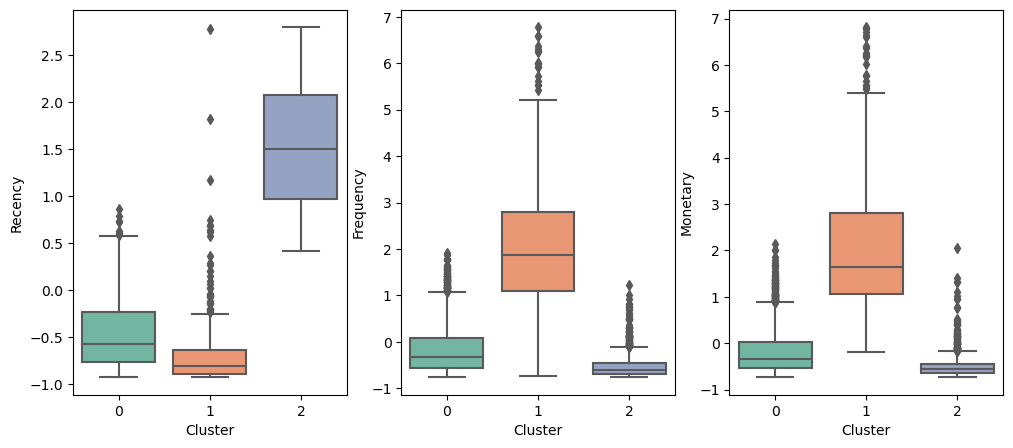

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (12, 5))

sns.boxplot(data = rfm_standard, x = 'Cluster', y = 'Recency', palette = 'Set2', ax = axes[0])
sns.boxplot(data = rfm_standard, x = 'Cluster', y = 'Frequency', palette = 'Set2', ax = axes[1])
sns.boxplot(data = rfm_standard, x = 'Cluster', y = 'Monetary', palette = 'Set2', ax = axes[2])

plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

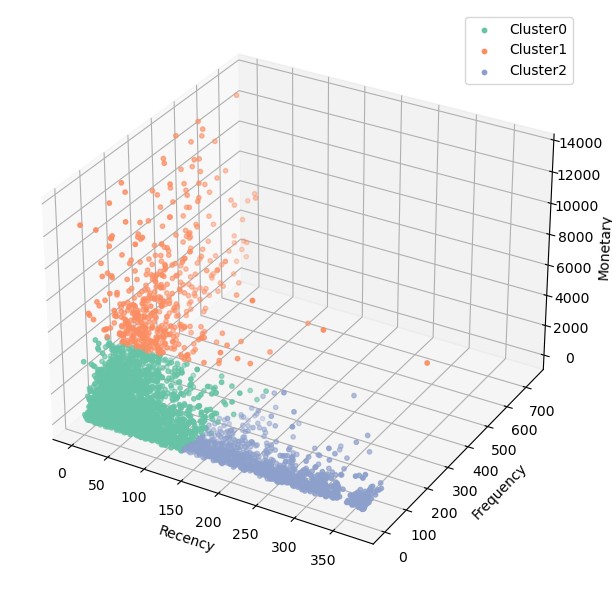

In [ ]:
colors = ['#66C3A5', '#FC8D62', '#8DA0CB']
fig = plt.figure(figsize = (8, 6))
ax = plt.axes(projection = '3d')

for i in range(kmeans.n_clusters):
    rfm_standard = rfm_k3[rfm_k3['Cluster'] == i]
    ax.scatter(rfm_standard['Recency'],
               rfm_standard['Frequency'],
               rfm_standard['Monetary'],
               s = 10,
               label = 'Cluster' + str(i),
               c = colors[i])

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.tight_layout()
plt.legend()
plt.show()

<a id="6"></a> <br>
## <font color='blue'> 6. Conclusion </font>

* Tool: Power BI



* Cluster 0 :  64%， RFM 2-3， potential_loyalists
 need_attention
* Cluster 1 :  11%， RFM  4， champions
* Cluster 2 :  25%， RFM  2，hibernating